# AccelerateAI - Data Science Bootcamp

### Simple Linear Regression

Our first exercise is to implement what we learn in theory about linear regression.

We will write code to find the solution to linear regression equation from first principles.

In [1]:
import numpy as np
from scipy.stats import pearsonr, linregress
import matplotlib.pyplot as plt 

#### Linear Regression 

For the equation y = b_0 + b_1*x, we know that:<br>
 - b_1 = cov(x,y)/var(x) = corr(x,y)* std(y)/std(x)
 - b_0 = mean(y) - b_1*mean(x) 

In [2]:
def least_squares_fit(X, Y):
    """
    Given two vectors X and Y,
    find the least-squares values of b_0 and b_1
    """
    corr, _ = pearsonr(X, Y)
    b_1 = corr*np.std(Y)/np.std(X)
    b_0 = np.mean(Y) - b_1*np.mean(X)
    return b_0, b_1

In [3]:
def predict(b_0, b_1, x_i,):
    return b_0 + b_1*x_i 

def residual(b_0, b_1, x_i, y_i):
    return y_i - predict(b_0, b_1, x_i) 

In [4]:
def sum_of_sq_errors(b_0, b_1, X, Y) -> float:
    sse  = sum(residual(b_0, b_1, x_i, y_i)**2 for x_i, y_i in zip(X, Y))
    return sse

In [5]:
X = np.array(range(20))
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [6]:
error = np.random.normal(0, 10, size=20)
Y =  5*X + 10 + error

In [7]:
Y

array([  9.59816107,  19.20973873,  27.5804358 ,  17.95796742,
         9.68974542,  24.0633854 ,  41.40617886,  47.33733533,
        46.51949317,  50.02637637,  47.52713618,  46.28744551,
        61.38922464,  70.16277288,  86.15438392,  87.69133334,
        82.86727833, 105.98311731,  82.0549496 , 120.52675054])

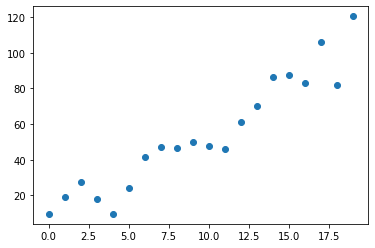

In [8]:
plot = plt.scatter(X,Y)

In [9]:
# Estimate the regression coefficients 
b_0 , b_1 = least_squares_fit(X,Y)
print("b_0:",b_0, " b_1:", b_1)

b_0: 5.051162457347679  b_1: 5.173736635083477


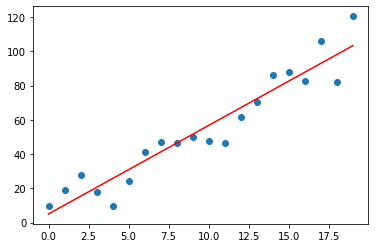

In [10]:
# Let's check the fit 
Y_pred = b_0 + b_1*X
plt.scatter(X,Y)
plt.plot(X, Y_pred, '-r', label='y=2x+1')
plt.show()

In [11]:
SSE = sum_of_sq_errors(b_0 , b_1,X,Y)
print("SSE:",SSE)

SSE: 1846.6957738037554


In [12]:
# Check with a standard library
regr_results = linregress(X, Y)
print("b_0:",regr_results.intercept, " b_1:",regr_results.slope)

b_0: 5.051162457347651  b_1: 5.17373663508348
